# Boston Housing Mini Project

![portada](images/boston.png)

# ¿Qué tienes que hacer?
- Explorar el dataset
- Buscar correlación entre variables
- Hacer plots explicativos de tus hipótesis
- Entender las variables
- Probar modelos de regresión con todas, algunas o una variable ... (según consideres)
- Revisar las métricas aprendidas en clase (R2 y R2ajustado)
- ¡¡Practicar lo que hemos visto en clase!!
- Sobre todo, disfrutar y subirte en el cohete 🚀🔥

# Librerías

Recordad que lo primero es importar las librerías

In [1]:
#importa aquí todo lo que necesites
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Datitos

Os dejamos los datos cargados 🏡

In [5]:
boston_dataset = load_boston()

In [6]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston['MEDV'] = boston_dataset.target

In [8]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Exploración del dataset

En este punto tendremos que buscar información sobre lo que significa cada variable, mirar cómo de limpios están los datos, entender cuál es la variable "predictora".... 

- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per 10000 dolares
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by - town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

In [7]:
boston_null_col = boston.isnull().sum().apply(lambda x: x/boston.shape[0]).sort_values(ascending=False)
boston_null_col

MEDV       0.0
LSTAT      0.0
B          0.0
PTRATIO    0.0
TAX        0.0
RAD        0.0
DIS        0.0
AGE        0.0
RM         0.0
NOX        0.0
CHAS       0.0
INDUS      0.0
ZN         0.0
CRIM       0.0
dtype: float64

Variable predictora = MDIV

## Correlación entre las variables

¿Qué correlación existe entre las diferentes variables? Analízalo y píntalo de diferentes maneras. 

In [8]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


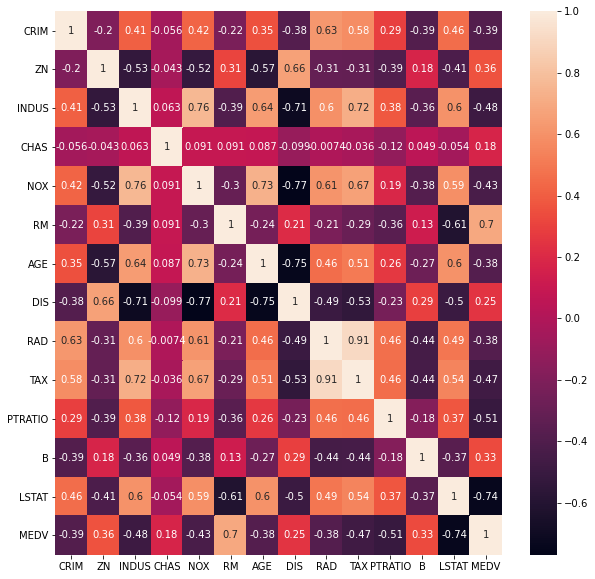

In [14]:
fig, ax = plt.subplots(figsize=(10,10)) 
corr_matrix = boston.corr() # Set variable with dataframe correlations.
sns.heatmap(corr_matrix, annot = True,); # Ploting a heatmap.

In [18]:
RM = np.corrcoef(boston["MEDV"], boston["RM"])
RM

array([[1.        , 0.69535995],
       [0.69535995, 1.        ]])

## Entrena modelos de regresión con todas, algunas o una variable ... (según consideres)

Analiza el R2 y el R2 Ajustado y la significatividad de las variables con el p-valor, ve entrenando diferentes modelos combinando variables según consideres hasta hacer que el R2 y el R2 Ajustado suban lo máximo posible

In [18]:
results = smf.ols('MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + AGE + DIS + RAD + TAX + B + RM + PTRATIO + LSTAT', data = boston).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 24 Apr 2021   Prob (F-statistic):          6.72e-135
Time:                        13:07:32   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [19]:
results = smf.ols('MEDV ~ CRIM + ZN + CHAS + NOX + DIS + RAD + TAX + B + RM + PTRATIO + LSTAT', data = boston).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 24 Apr 2021   Prob (F-statistic):          5.54e-137
Time:                        13:08:02   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.0

<AxesSubplot:xlabel='CRIM', ylabel='MEDV'>

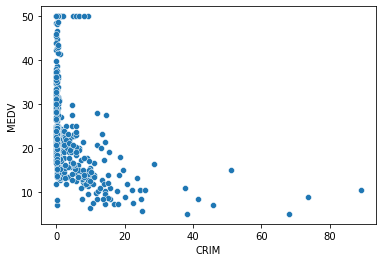

In [40]:
sns.scatterplot(x=boston['CRIM'], y=boston['MEDV'])

<AxesSubplot:xlabel='ZN', ylabel='MEDV'>

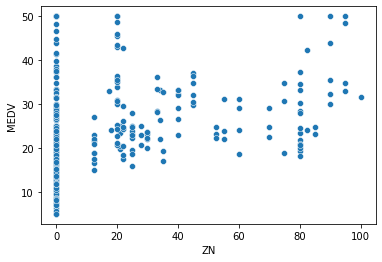

In [41]:
sns.scatterplot(x=boston['ZN'], y=boston['MEDV'])

<AxesSubplot:xlabel='CHAS', ylabel='MEDV'>

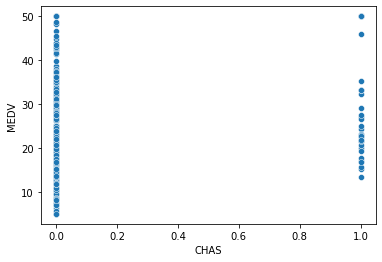

In [42]:
sns.scatterplot(x=boston['CHAS'], y=boston['MEDV'])

<AxesSubplot:xlabel='DIS', ylabel='MEDV'>

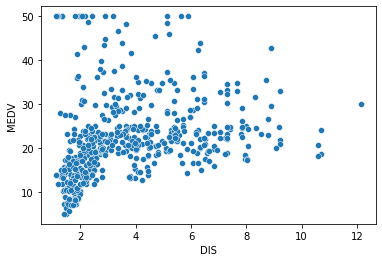

In [45]:
sns.scatterplot(x=boston['DIS'], y=boston['MEDV'])

<AxesSubplot:xlabel='RAD', ylabel='MEDV'>

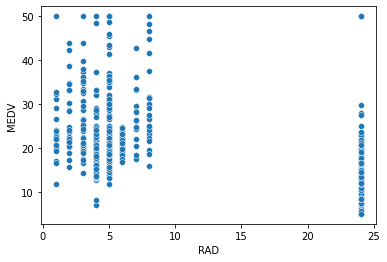

In [46]:
sns.scatterplot(x=boston['RAD'], y=boston['MEDV'])

<AxesSubplot:xlabel='TAX', ylabel='MEDV'>

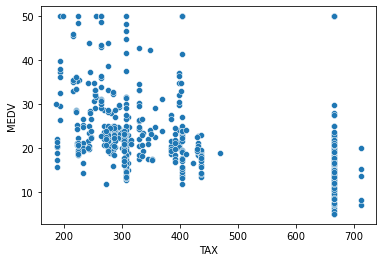

In [47]:
sns.scatterplot(x=boston['TAX'], y=boston['MEDV'])

<AxesSubplot:xlabel='B', ylabel='MEDV'>

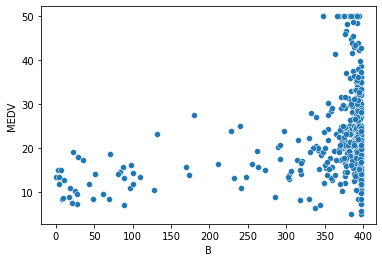

In [48]:
sns.scatterplot(x=boston['B'], y=boston['MEDV'])

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

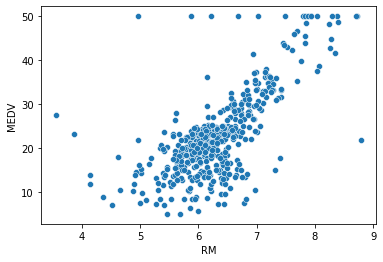

In [49]:
sns.scatterplot(x=boston['RM'], y=boston['MEDV'])

<AxesSubplot:xlabel='PTRATIO', ylabel='MEDV'>

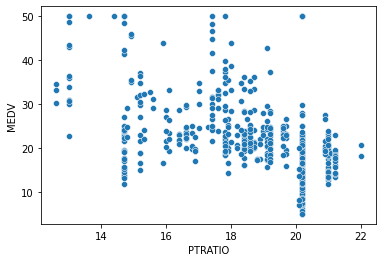

In [51]:
sns.scatterplot(x=boston['PTRATIO'], y=boston['MEDV'])

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

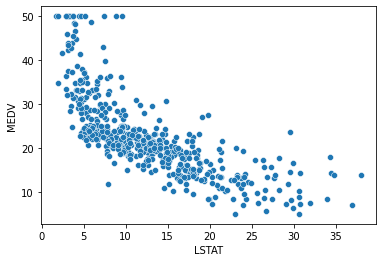

In [52]:
sns.scatterplot(x=boston['LSTAT'], y=boston['MEDV'])

In [75]:
results = smf.ols('MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + AGE + DIS + RAD + TAX + np.log(B) + RM + PTRATIO + np.log(LSTAT)', data = boston).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     145.1
Date:                Sat, 24 Apr 2021   Prob (F-statistic):          7.09e-159
Time:                        14:00:00   Log-Likelihood:                -1441.6
No. Observations:                 506   AIC:                             2911.
Df Residuals:                     492   BIC:                             2970.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        53.1839      5.101     10.427

In [80]:
results = smf.ols('MEDV ~ CRIM + ZN + CHAS + NOX + AGE + DIS + RAD + TAX + np.log(B) + RM + PTRATIO + np.log(LSTAT)', data = boston).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     157.5
Date:                Sat, 24 Apr 2021   Prob (F-statistic):          5.71e-160
Time:                        14:11:30   Log-Likelihood:                -1441.7
No. Observations:                 506   AIC:                             2909.
Df Residuals:                     493   BIC:                             2964.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        53.1165      5.089     10.438

## Conclusiones o extras